## 1. Загрузка датасета

In [1]:
import numpy as np
import pandas as pd

url='https://drive.google.com/uc?id=1sNvnsY9aom2jHFfHcaZOLRZkoJmK5m7M'

df = pd.read_excel(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Месторождение                                   2439 non-null   object        
 1   № скважины                                      2439 non-null   object        
 2   Тип скважины                                    2439 non-null   object        
 3   Пласт                                           2439 non-null   object        
 4   Тип коллектора                                  2439 non-null   object        
 5   Мощность пласта, м                              2439 non-null   float64       
 6   Начальное пластовое давление, атм               2439 non-null   int64         
 7   Текущее пластовое давление, атм                 2439 non-null   int64         
 8   Tекущий дебит нефти, тн                         

## 2. Подготовка датасета

Нас интересует только строки где есть значения в столбце "Прирост нефти от кислотных ОПЗ", поскольку для остальных строк значений нет, то просто удалаяем их.

In [2]:
# Удаляем строки где в 18 столбце есть NULL
df.dropna(subset=['Прирост нефти от кислотных обработок, тн'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 745
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Месторождение                                   718 non-null    object        
 1   № скважины                                      718 non-null    object        
 2   Тип скважины                                    718 non-null    object        
 3   Пласт                                           718 non-null    object        
 4   Тип коллектора                                  718 non-null    object        
 5   Мощность пласта, м                              718 non-null    float64       
 6   Начальное пластовое давление, атм               718 non-null    int64         
 7   Текущее пластовое давление, атм                 718 non-null    int64         
 8   Tекущий дебит нефти, тн                         71

In [3]:
# ПРеобразуем столбец ГРП в котегориальный признак (1 - есть ГРП, 2 - нет ГРП)
df['Наличие ГРП'] = df['Наличие ГРП'].fillna(0)
df.loc[df['Наличие ГРП'] != 0, 'Наличие ГРП'] = 1
df['Наличие ГРП'] = df['Наличие ГРП'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 745
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Месторождение                                   718 non-null    object        
 1   № скважины                                      718 non-null    object        
 2   Тип скважины                                    718 non-null    object        
 3   Пласт                                           718 non-null    object        
 4   Тип коллектора                                  718 non-null    object        
 5   Мощность пласта, м                              718 non-null    float64       
 6   Начальное пластовое давление, атм               718 non-null    int64         
 7   Текущее пластовое давление, атм                 718 non-null    int64         
 8   Tекущий дебит нефти, тн                         71

Удалим ненужные столбцы которые не могут сказываться на результате (номер скважины и рпоницаемость поскольку там отстутствуюет много знаяений)

In [4]:
df = df.drop('Проницаемость, мд', axis=1)
df = df.drop('№ скважины', axis=1)
df = df.drop('Месторождение', axis=1)
df = df.drop('Пласт', axis=1)
df = df.drop('Дата ввода скважины в эксплуатацию', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Тип скважины                                    718 non-null    object 
 1   Тип коллектора                                  718 non-null    object 
 2   Мощность пласта, м                              718 non-null    float64
 3   Начальное пластовое давление, атм               718 non-null    int64  
 4   Текущее пластовое давление, атм                 718 non-null    int64  
 5   Tекущий дебит нефти, тн                         718 non-null    float64
 6   Текущий дебит жидкости, м3                      718 non-null    float64
 7   Обводненость, %                                 718 non-null    int64  
 8   Текущий коэффициент продуктивности, м3/сут/атм  718 non-null    float64
 9   Скин-фактор                                

Преобразуем некоторые данные в категориальные

In [5]:
features = ['Тип скважины', 'Тип коллектора']
for feature in features:
  df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Тип скважины                                    718 non-null    category
 1   Тип коллектора                                  718 non-null    category
 2   Мощность пласта, м                              718 non-null    float64 
 3   Начальное пластовое давление, атм               718 non-null    int64   
 4   Текущее пластовое давление, атм                 718 non-null    int64   
 5   Tекущий дебит нефти, тн                         718 non-null    float64 
 6   Текущий дебит жидкости, м3                      718 non-null    float64 
 7   Обводненость, %                                 718 non-null    int64   
 8   Текущий коэффициент продуктивности, м3/сут/атм  718 non-null    float64 
 9   Скин-фактор                     

Добавялем столбец `Эффективность` именно этот параметр необходимо будет предстказывать. Эффективность=true если прирост дебита нефти после кислотных ОПЗ будет больше 3 тн/сут, и на оборот.

In [6]:
# если эффективность = 1, то успешно

df['Эффективность'] = np.where(df['Прирост нефти от кислотных обработок, тн']>3, 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 745
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Тип скважины                                    718 non-null    category
 1   Тип коллектора                                  718 non-null    category
 2   Мощность пласта, м                              718 non-null    float64 
 3   Начальное пластовое давление, атм               718 non-null    int64   
 4   Текущее пластовое давление, атм                 718 non-null    int64   
 5   Tекущий дебит нефти, тн                         718 non-null    float64 
 6   Текущий дебит жидкости, м3                      718 non-null    float64 
 7   Обводненость, %                                 718 non-null    int64   
 8   Текущий коэффициент продуктивности, м3/сут/атм  718 non-null    float64 
 9   Скин-фактор                     

По нашему датасету эффективность составляет 421/718= 57%

In [20]:
num_effecienty = df['Эффективность'].value_counts()[1]
num_non_effecienty = df['Эффективность'].value_counts()[0]

print("Общее количество проведенных работ: ", num_effecienty + num_non_effecienty)
print("Успешных: ", num_effecienty)
print("Не успешных: ", num_non_effecienty)

Общее количество проведенных работ:  718
Успешных:  421
Не успешных:  297


<Axes: title={'center': 'Эффективность кислотных обработок за 2022 год'}>

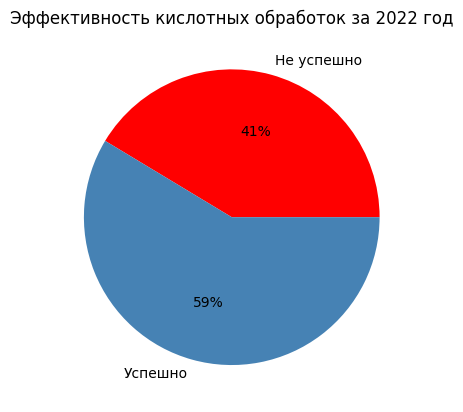

In [37]:
import matplotlib.pyplot as plt
df.groupby(['Эффективность']).size().to_frame().unstack().plot(kind='pie', autopct='%1.0f%%',
                                                               colors = ['red', 'steelblue'],
 title='Эффективность кислотных обработок за 2022 год',
                                                               labels = ['Не успешно', 'Успешно'])



## 3. Создание и обучение модели

Разделяем данные на обучающий и тестовый наборы:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Эффективность', axis=1)
X = X.drop('Прирост нефти от кислотных обработок, тн', axis=1)
# X = df.iloc[:, [0, 1, 2, 5, 6, 7, 8, 12, 13, 14]]
y = df['Эффективность']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

### 3.1 CatBoost

In [9]:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00


In [ ]:
# Обучаем модель
cat_model = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, cat_features=features)
cat_model.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе данных
y_pred = cat_model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

СОхранение модели:

In [11]:
cat_model.save_model('efficiency_acid_jobs.cbm')

In [17]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn import svm

# X = df.iloc[:, [3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14]]
# # X = df.drop('Эффективность', axis=1)
# # X = X.drop('Прирост нефти от кислотных обработок, тн', axis=1)
# y = df['Эффективность']
# # делим модель на тестовую и обучающую выборку
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn import svm
# model_S = Pipeline([
#         ("scaler", StandardScaler()),
#         ("linear_svc", svm.SVC(kernel='linear',C = 1.0)),
#     ])
# # обучаем модель и смотрим точность
# model_S.fit(X_train, y_train)
# model_S.score(X_test,y_test)

In [18]:
# from sklearn.neighbors import KNeighborsClassifier

# n_neighbors=10

# model = KNeighborsClassifier(n_neighbors = n_neighbors)
# model.fit(X_train,y_train)

# score = model.score(X_test,y_test)
# score

## 4. Предсказание

Функция принимает список (well) характеристик скважины, которую хотим оценить

In [12]:
def predict(well):
  # получаем список названий столбцов которые нужны для предсказания
  col_name = [column for column in df]
  col_name.pop()
  col_name.pop()

# Такой список должна принять функция
  # well = [well,
  #           type_form,
  #           power_form,
  #           begin_pressure,
  #           current_pressure,
  #           current_q_oil,
  #           current_q_liq,
  #           percent_water,
  #           productivity,
  #           skin,
  #           temperature,
  #           viscosity,
  #           frac]
  values = np.array([well])
  data_pred = pd.DataFrame(values, columns=col_name)

  predict = cat_model.predict(data_pred)

  result = ''
  match predict:
    case 0:
      result='НЕ эффективно'
    case 1:
      result='Эффективно'

  return result

Пример передачи в функцию

In [13]:
well_1 = ["ВЕРT",
            "Карбонат-известняк",
            4.0,
            345,
            300,
            1.7,
            3.0,
            33,
            0.01,
            154.2,
            59,
            1.7,
            0]

print(predict(well_1))

Эффективно


# Веб приложение Flask

In [14]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15964 sha256=28920857dec73f34f36a13409a177f3c0580bea8ab363513041120eb5bfb9590
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


Линкуем Google Drive в Colab

In [15]:
from google.colab import drive
drive.mount('/drive')
#!!! ВОЗМОЖо если не отображается google disk в левой части, то его придется вручную прилинковать нажав кнопку

Mounted at /drive


In [16]:
!ngrok authtoken 2YLeY1623EHVhOgCm2tZgisb0vd_5qYAKaocYCZjhmVJwW6JL

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Импортируем необходимые библиотеки

In [17]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle

In [19]:
templates = '/content/drive/MyDrive/ML_finalProject/templates'

# Создаем приложение Flask
app = Flask(__name__, template_folder=templates)
# Запускаем Flask приложение с помощью ngrok Для того что бы можно было открывать приложение в COlabе через браузер
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/getprediction',methods=['POST'])
def getprediction():

    input = [(x) for x in request.form.values()]
    print(input)
    final_input = [np.array(input)]
    # prediction = model.predict(final_input)
    prediction = predict(input)

    return render_template('index.html', output='Оценка скважины :{}'.format(prediction))

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
